# Method

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
import sklearn.cluster as cluster
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_selection import VarianceThreshold
sns.set_theme(style="whitegrid", palette='Set2')
import plotly.express as px
from sklearn.decomposition import PCA

## Data Selection

In [2]:
df = pd.read_csv('/Users/liumingqian/anly-501-project-liumingqian0511/data/01-modified-data/rand.csv')
df['plan_type'] = df['plan_type'].astype('category').cat.codes
df.drop(columns = ['person','catastrophic','free','outpatient_expenses','mhi'], inplace = True)
df.head()

X = df.drop(columns=['plan_type'])
y = df['plan_type']

## Feature Selection

In [3]:
var_thr = VarianceThreshold(threshold = 0.25)
X_high_variance = var_thr.fit_transform(X)
scale = StandardScaler()
scale.fit(X_high_variance)
X = scale.transform(X_high_variance)
X.shape

(2554, 10)

## K-means
### Hyper-parameter Tuning

- Cluster tuning

In [4]:
# for k means clustering we will use the elbow method to find the optimal number of clusters. we will use the inertia_ attribute to find the sum of squared distances of samples to their closest cluster center. we will use the range of 1 to 10 clusters. plot the inertia_ values for each number of clusters. make sure to save it in a dataframe and plot it using matplotlib.
distortions = [] 
inertias = []
sil = []
K = range(1,11)
for k in K: 
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)     
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
    result= pd.DataFrame({'Cluster':np.arange(1,k+1),'Distortion':distortions, 'Inertia':inertias})

print(result)

   Cluster  Distortion       Inertia
0        1    2.848704  25540.000000
1        2    2.620884  22141.424090
2        3    2.497097  19182.090469
3        4    2.380321  17612.836514
4        5    2.292360  16442.620226
5        6    2.251860  15440.347308
6        7    2.222557  14399.654417
7        8    2.181763  13885.095321
8        9    2.136778  13332.331215
9       10    2.109380  12930.558109


Text(0.5, 1.0, 'K vs Distortion')

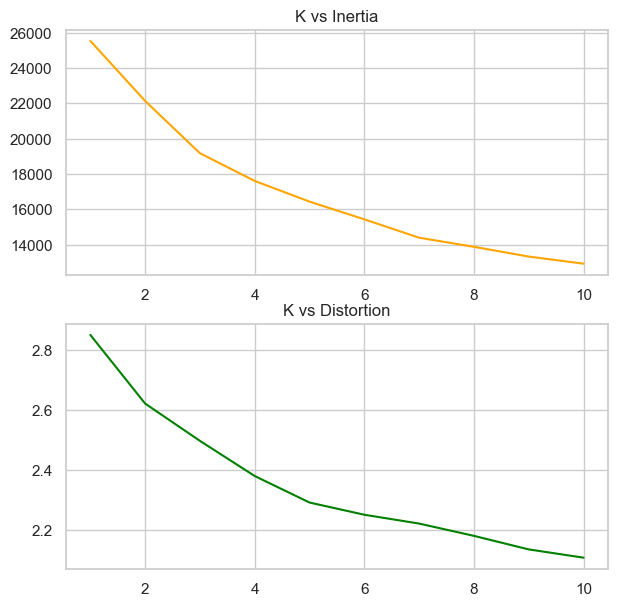

In [5]:
fig, (ax1,ax2) = plt.subplots(2, 1)
fig.set_size_inches(7,7)
ax1.plot(result['Cluster'],result['Inertia'],'orange')
ax1.set_title('K vs Inertia')
ax2.plot(result['Cluster'],result['Distortion'],'green',label='Distortion vs. K')
ax2.set_title('K vs Distortion')

   Cluster  Silhouette
0        2    0.178803
1        3    0.171532
2        4    0.142135
3        5    0.128075
4        6    0.131053
5        7    0.138207
6        8    0.128283
7        9    0.114903
8       10    0.115497


array([<AxesSubplot:xlabel='Cluster'>], dtype=object)

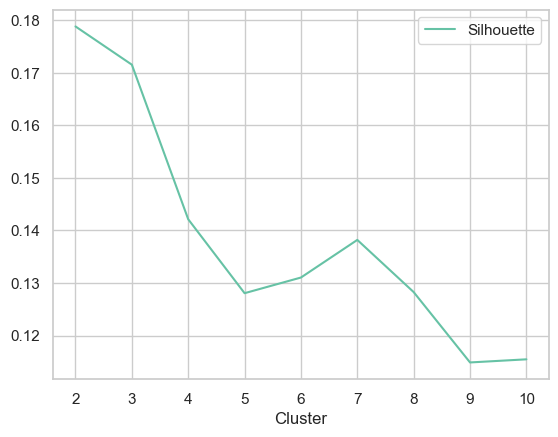

In [6]:
sil = []
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    labels = kmeanModel.labels_
    if len(np.unique(labels)) == 1:
        continue
    sil.append(silhouette_score(X, labels))
    result_sil = pd.DataFrame({'Cluster':np.arange(2,k+1), 'Silhouette':sil})

print(result_sil)
result_sil.plot.line(x = 'Cluster',subplots=True)

### Final Result

In [7]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(X)
labels01=np.array(kmeanModel.labels_)
len(np.unique(labels01))


3

In [8]:
pca = PCA(n_components=3)
components = pca.fit_transform(X)
total_var = pca.explained_variance_ratio_.sum() * 100
fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=labels01,
    color_continuous_scale="GnBu",
    title=f'Total Explained Variance: {total_var:.2f}%',
    range_x=[-3,6],
    range_y = [-3,6],
    range_z = [0,6],
    width=900,
    height=600
)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
    title_text = 'K-means',
    title_x = 0.5,
    title_y = 0.9
)
fig.update_traces(marker_size = 3)
fig.show()


## DBSCAN
### Hyper-parameter Tuning

- eps

In [9]:
eps_range = np.arange(0.1,2.1,0.1)
for i in eps_range:
    db = DBSCAN(eps=i, min_samples=5).fit(X)
    labels = db.labels_
    if len(np.unique(labels)) == 1:
        continue
    silhouette_avg = silhouette_score(X, labels)
    print(
        "For eps = {:0.2f}".format(i),
        "The average silhouette_score is {:0.4f}.".format(silhouette_avg)
    )

For eps = 0.70 The average silhouette_score is -0.2988.
For eps = 0.80 The average silhouette_score is -0.3793.
For eps = 0.90 The average silhouette_score is -0.3218.
For eps = 1.00 The average silhouette_score is -0.3423.
For eps = 1.10 The average silhouette_score is -0.2007.
For eps = 1.20 The average silhouette_score is -0.1729.
For eps = 1.30 The average silhouette_score is -0.0891.
For eps = 1.40 The average silhouette_score is -0.0159.
For eps = 1.50 The average silhouette_score is 0.1505.
For eps = 1.60 The average silhouette_score is 0.1265.
For eps = 1.70 The average silhouette_score is 0.3163.
For eps = 1.80 The average silhouette_score is 0.3423.
For eps = 1.90 The average silhouette_score is 0.3143.
For eps = 2.00 The average silhouette_score is 0.2973.


- minimum sample

In [10]:
S = np.arange(1,11)
for s in S:
    db = DBSCAN(eps=1.8, min_samples=s).fit(X)
    labels = db.labels_
    if len(np.unique(labels)) == 1:
        continue
    silhouette_avg = silhouette_score(X, labels)
    print(
        "For min_samples = {:0.2f}".format(s),
        "The average silhouette_score is {:0.4f}.".format(silhouette_avg)
    )

For min_samples = 1.00 The average silhouette_score is -0.1809.
For min_samples = 2.00 The average silhouette_score is -0.0292.
For min_samples = 3.00 The average silhouette_score is 0.1463.
For min_samples = 4.00 The average silhouette_score is 0.1416.
For min_samples = 5.00 The average silhouette_score is 0.3423.
For min_samples = 6.00 The average silhouette_score is 0.3361.
For min_samples = 7.00 The average silhouette_score is 0.3327.
For min_samples = 8.00 The average silhouette_score is 0.3307.
For min_samples = 9.00 The average silhouette_score is 0.3246.
For min_samples = 10.00 The average silhouette_score is 0.3225.


### Final Result

In [11]:
db = DBSCAN(eps=1.8, min_samples=5).fit(X)
labels02 = db.labels_
len(np.unique(labels02))
pca = PCA(n_components=3)
components = pca.fit_transform(X)
total_var = pca.explained_variance_ratio_.sum() * 100
fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=labels02,
    color_continuous_scale="Plotly3",
    title=f'Total Explained Variance: {total_var:.2f}%',
    range_x=[0,10],
    range_y = [-3,4],
    width=900,
    height=600
)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor='LightSteelBlue',
    title_text = 'DBSCAN',
    title_x = 0.5,
    title_y = 0.9
)
fig.update_traces(marker_size = 4)
fig.show()

## Agglomerative Clustering
### Hyper-parameter Tuning

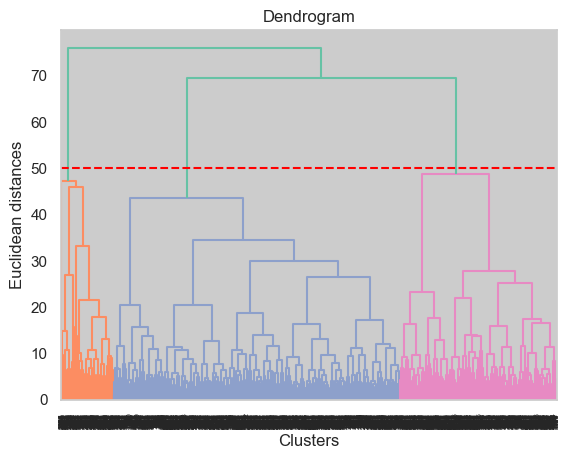

In [12]:
import scipy.cluster.hierarchy as sch
cluster_visualising=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distances')
plt.axhline(y=50, color='r', linestyle='--')
plt.show()

In [13]:
agg=AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
agg.fit(X)
agg_pred=agg.fit_predict(X)
labels03 = agg.labels_

### Final Result

In [14]:
pca = PCA(n_components=3)
components = pca.fit_transform(X)
total_var = pca.explained_variance_ratio_.sum() * 100
fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=labels03,
    color_continuous_scale="GnBu",
    title=f'Total Explained Variance: {total_var:.2f}%',
    range_x=[0,9],
    range_y = [-3,4],
    width=900,
    height=600
)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor='LightSteelBlue',
    title_text = 'Agglomerative Cluster',
    title_x = 0.5,
    title_y = 0.9
)
fig.update_traces(marker_size = 4)
fig.show()

## Results Comparison

In [17]:
print('The silhouette score for the final model of k-means is:',silhouette_score(X, labels01))
print('The silhouette score for the final model of DBCAN is:',silhouette_score(X, labels02))
print('The silhouette score for the final model of Agglomerative is:',silhouette_score(X, labels03))

The silhouette score for the final model of k-means is: 0.17204076731427817
The silhouette score for the final model of DBCAN is: 0.34230051015500773
The silhouette score for the final model of Agglomerative is: 0.14296226809689475


Text(0.5, 1.0, 'Agglomerative')

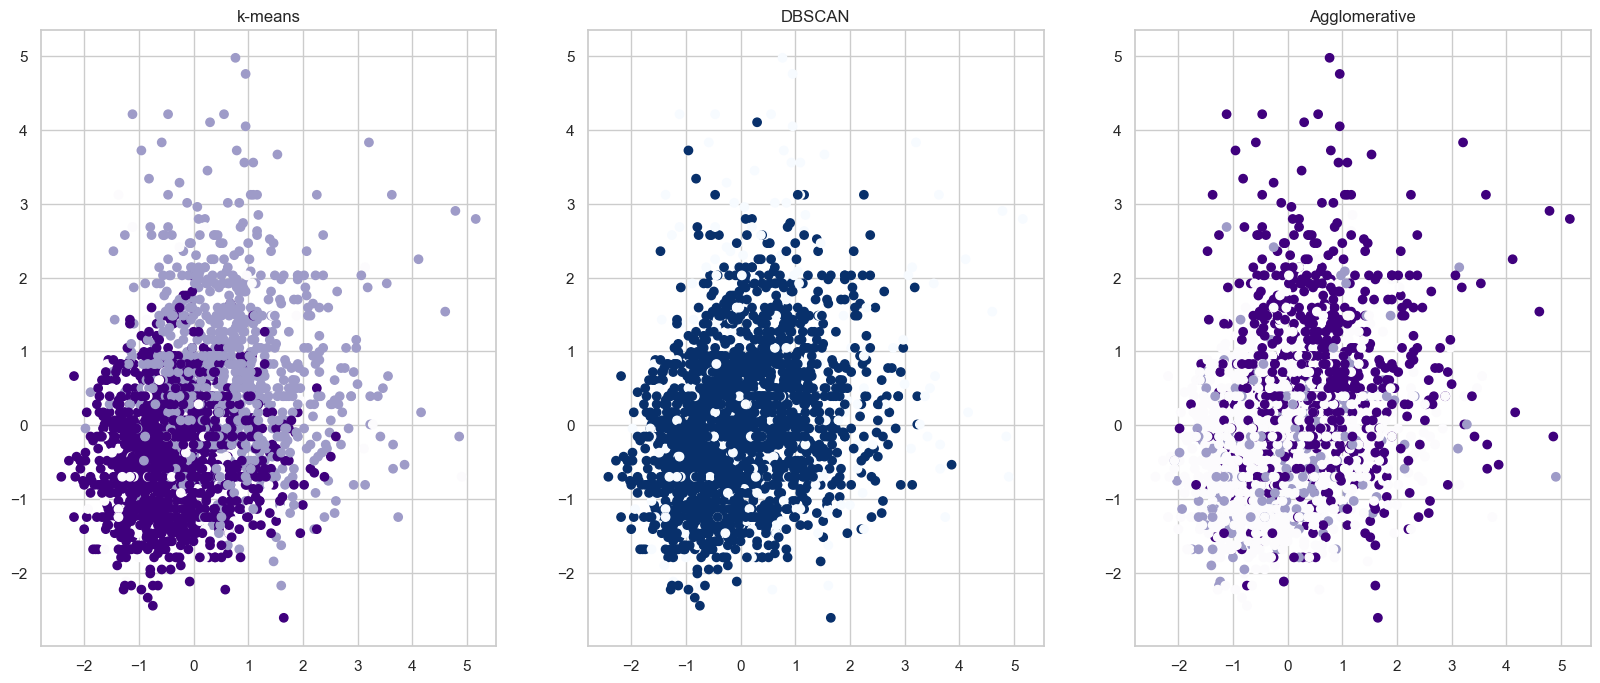

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(20, 8)
ax1.scatter(X[:,4], X[:,5],c=labels01,cmap='Purples_r')
ax1.set_title('k-means')
ax2.scatter(X[:,4], X[:,5],c=labels02,cmap='Blues')
ax2.set_title('DBSCAN')
ax3.scatter(X[:,4], X[:,5],c=labels03,cmap='Purples_r')
ax3.set_title('Agglomerative')